# Analyzing Housing data

In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv("cleaned_sales.csv", index_col="id")
df["ppm"] = df.apply(lambda x: x.price / x.living_surface if x.living_surface > 0 else None, axis=1)
df.shape

(17515, 31)

In [4]:
municipalities = df[df.region == "Wallonie"].groupby(by="postal_code")["price"].agg({'count', 'mean', 'median'})

In [5]:
municipalities[municipalities["count"] > 10].sort_values(by="median", ascending=True).head(10)

,median,mean,count
postal_code,,,
7301,124500.00,144250.00,12
7340,125000.00,134256.10,41
7390,129750.00,144130.77,26
6200,132500.00,145351.43,35
7321,137450.00,213103.85,13
7012,140000.00,146855.56,18
6060,145000.00,144988.89,27
7370,147500.00,171159.09,44
7141,149000.00,163800.00,15


In [6]:
ppm = df[df.region == "Brussels"].groupby(by="postal_code")["ppm"].agg({'count', 'mean', 'median'})
ppm[ppm["count"] > 10].sort_values(by="median", ascending=False).head(10)

,median,mean,count
postal_code,,,
1050,4608.70,5037.27,373
1150,4204.55,4519.77,161
1160,4071.43,4198.53,109
1000,3967.95,4294.46,418
1180,3820.00,4261.27,505
1040,3809.52,3944.62,135
1060,3741.79,3815.28,90
1200,3619.79,3695.78,157
1170,3605.56,3678.77,23


In [7]:
sns.set_theme()

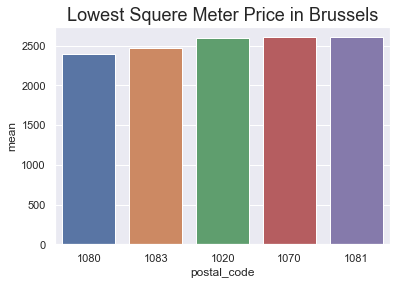

In [8]:
ax = sns.barplot(x=ppm.index, y="mean", data=ppm, order=ppm[ppm["count"] > 10].sort_values(by="mean", ascending=True).iloc[:5].index)
plt.title('Lowest Squere Meter Price in Brussels', size=18)
plt.savefig("lowestPpmBrussels.png")
plt.show()

In [9]:
ppm = df.groupby(by="region")["ppm"].agg({'count', 'mean', 'median'})

In [10]:
ppm.sort_values(by="median", ascending=False)

,median,mean,count
region,,,
Brussels,3600.00,3892.35,2797
Flanders,2580.96,3039.45,8336
Wallonie,1796.81,1913.24,4576


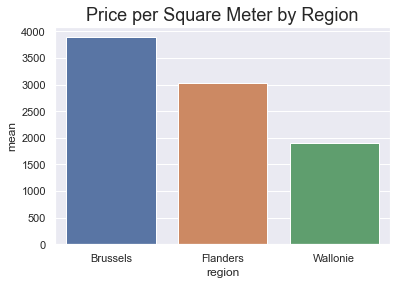

In [11]:
ax = sns.barplot(x=ppm.index, y="mean", data=ppm, order=ppm.sort_values(by="mean", ascending=False).iloc[:5].index)
plt.title('Price per Square Meter by Region', size=18)
plt.savefig("PPMeRegions.png")
plt.show()

In [15]:
df.groupby(by="province")["price"].agg({"count"}).sort_values("count", ascending=False)

,count
province,
West Flanders,3404
Brussels,2916
East Flanders,2585
Flemish Brabant,1641
Liège,1584
Antwerp,1577
Hainaut,1512
Walloon Brabant,1048
Luxembourg,518
